<a href="https://colab.research.google.com/github/TOFWAQ/Kaggle_Challenge/blob/main/TEAM_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import IterativeImputer


In [18]:
#Read the train data as a panda dataframe
train_link = ('https://raw.githubusercontent.com/TOFWAQ/Train_data/main/train.csv')
train = pd.read_csv(train_link)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
#Read the test data as a panda dataframe
test_link = ('https://raw.githubusercontent.com/TOFWAQ/Train_data/main/test.csv') #overwrite your test link directorty
test = pd.read_csv(test_link)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<ipython-input-20-fd1669104a64>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


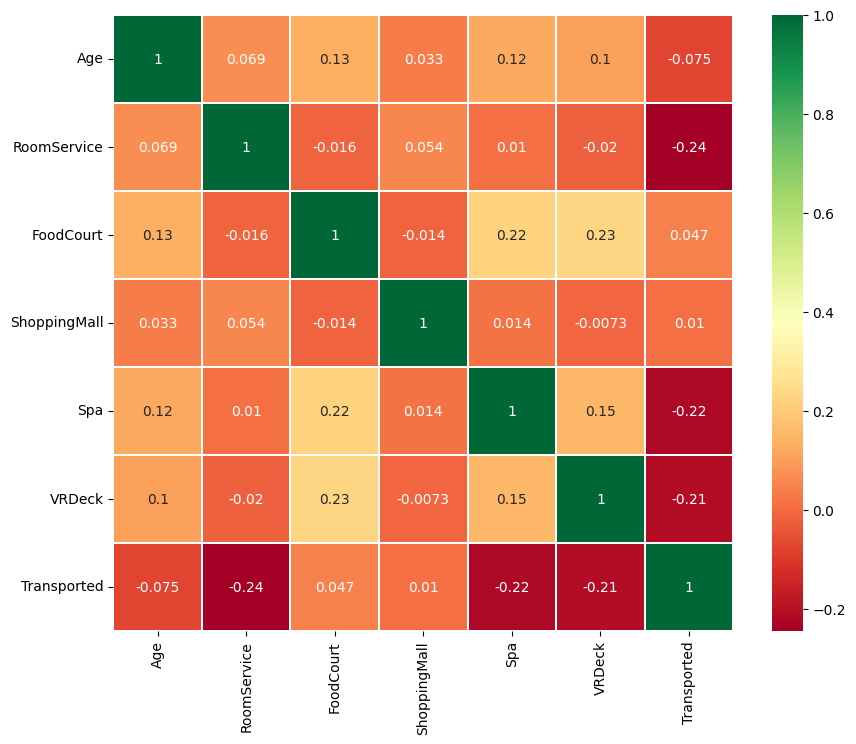

In [20]:
'''Correlation Between The Features'''
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<ipython-input-21-e46f64c1910b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


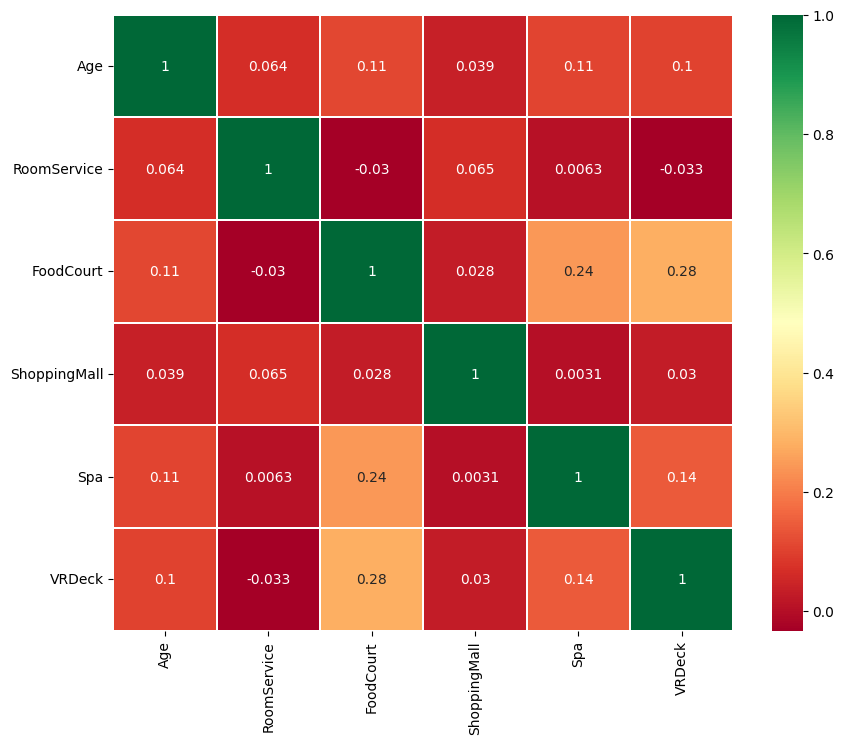

In [21]:
'''Correlation Between The Features'''
sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [22]:
#shape of dataset
train.shape

(8693, 14)

In [23]:
#info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [24]:
#Check nulls for both train and test data
def check_null_values(dfs):
    for df in dfs:
        print(df.isnull().sum())
        print("\n")

# Use the function
check_null_values([train, test])

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64




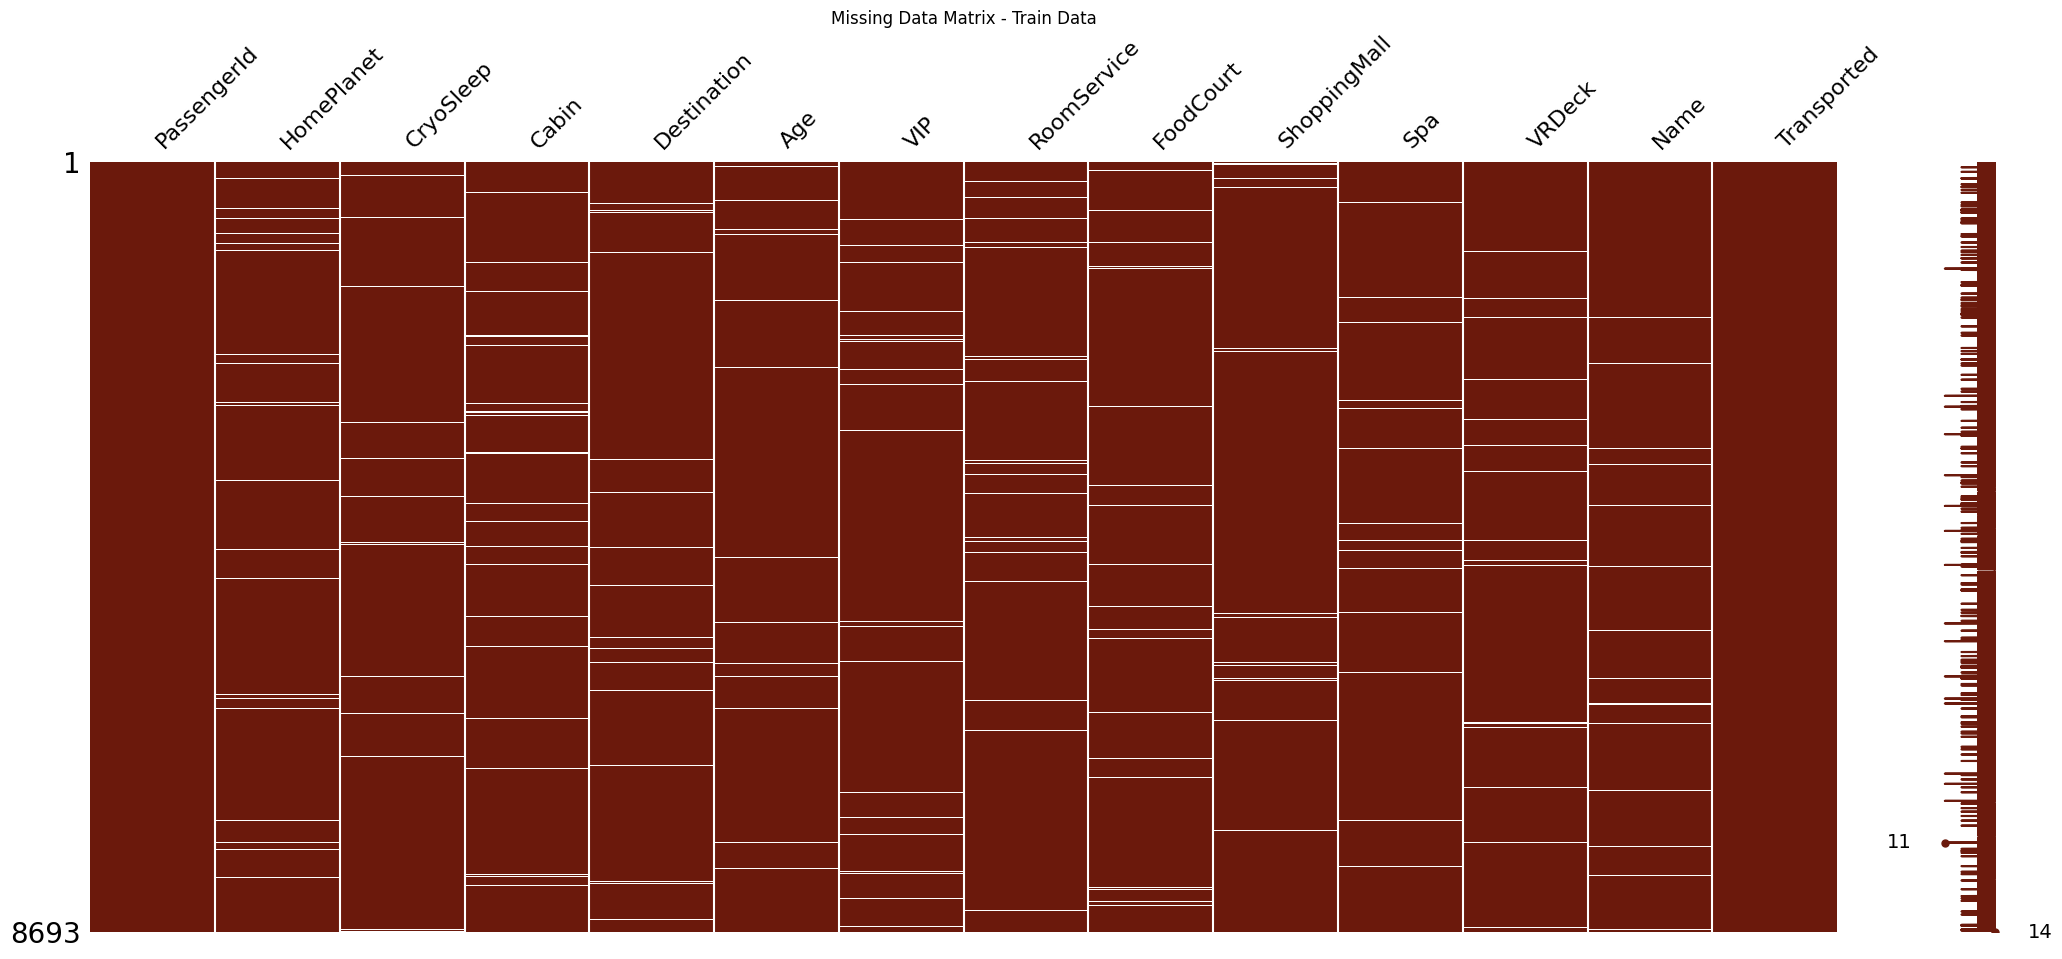

In [25]:
#Visualise the null values
# Set the color of the missing values to 'red'
msno.matrix(train, color=(0.42, 0.1, 0.05))

plt.title('Missing Data Matrix - Train Data')
plt.show()

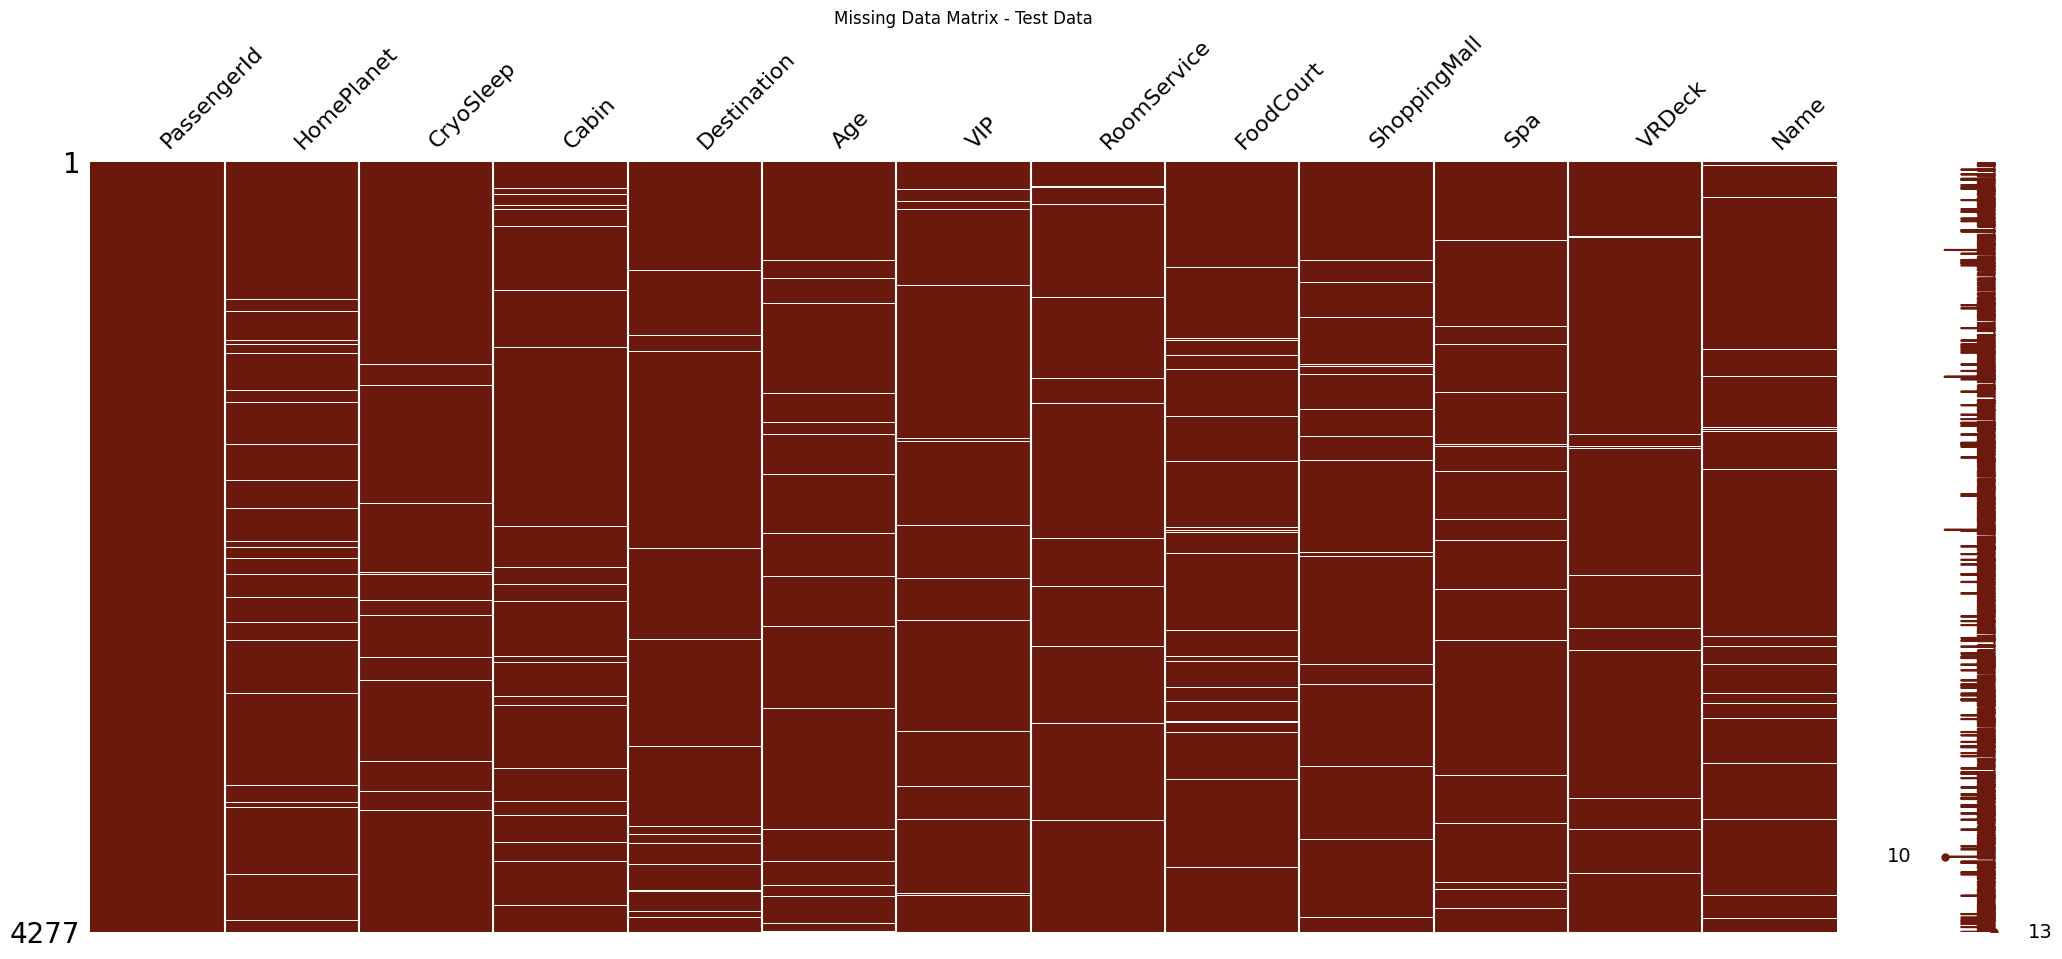

In [26]:
#Visualise the missing value for test data
msno.matrix(test, color=(0.42, 0.1, 0.05))

plt.title('Missing Data Matrix - Test Data')
plt.show()

In [12]:
# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder and transform the dataset
df_encoded = encoder.fit_transform(train)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Perform the imputation
df_imputed = mice_imputer.fit_transform(df_encoded)

# Convert imputed output to a pandas dataframe
train_n = pd.DataFrame(df_imputed, columns=train.columns)

# Convert the imputed dataset back to original categories
train_n_encoded = encoder.inverse_transform(df_imputed)

train_n = pd.DataFrame(train_n_encoded, columns=train.columns)
train_n.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,6262.0,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [29]:
# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder and transform the dataset
dff_encoded = encoder.fit_transform(test)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Perform the imputation
dff_imputed = mice_imputer.fit_transform(dff_encoded)

# Convert imputed output to a pandas dataframe
test_n = pd.DataFrame(dff_imputed, columns=test.columns)

# Convert the imputed dataset back to original categories
test_n_encoded = encoder.inverse_transform(dff_imputed)

test_n = pd.DataFrame(test_n_encoded, columns=test.columns)
test_n.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,171.0,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [30]:
#Check nulls for both train and test data
def check_null_values(dfs):
    for df in dfs:
        print(df.isnull().sum())
        print("\n")

# Use the function
check_null_values([train_n,test_n])

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             1
VRDeck          2
Name            0
Transported     0
dtype: int64


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64




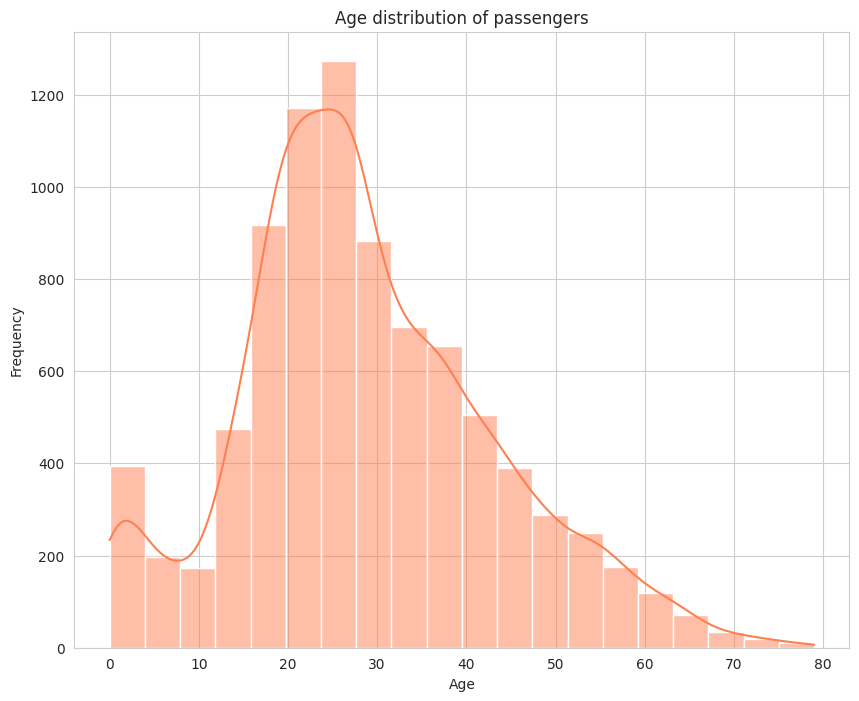

In [ ]:
# Age distribution of passengers
plt.figure(figsize=(10,8))
sns.histplot(train['Age'], bins=20, kde=True, color='coral')  # Changed color to 'coral'
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-68-6bb8fb036001>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='HomePlanet', data=train, order=train['HomePlanet'].value_counts().index, palette='dark')


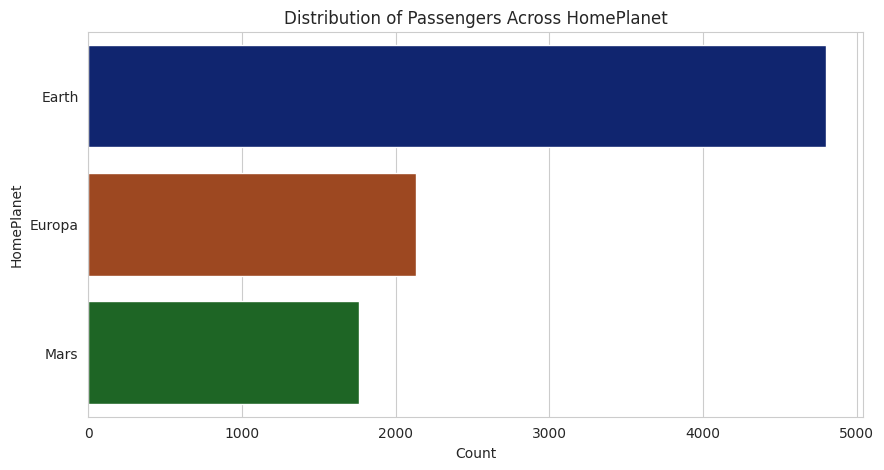

In [ ]:
# Distribution of passengers across Homeplanet
plt.figure(figsize=(10,5))
sns.countplot(y='HomePlanet', data=train, order=train['HomePlanet'].value_counts().index, palette='dark')
plt.title('Distribution of Passengers Across HomePlanet')
plt.xlabel('Count')
plt.ylabel('HomePlanet')
plt.show()

<ipython-input-69-2678669b6c10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Destination', data=train, order=train['Destination'].value_counts().index, palette='bright')


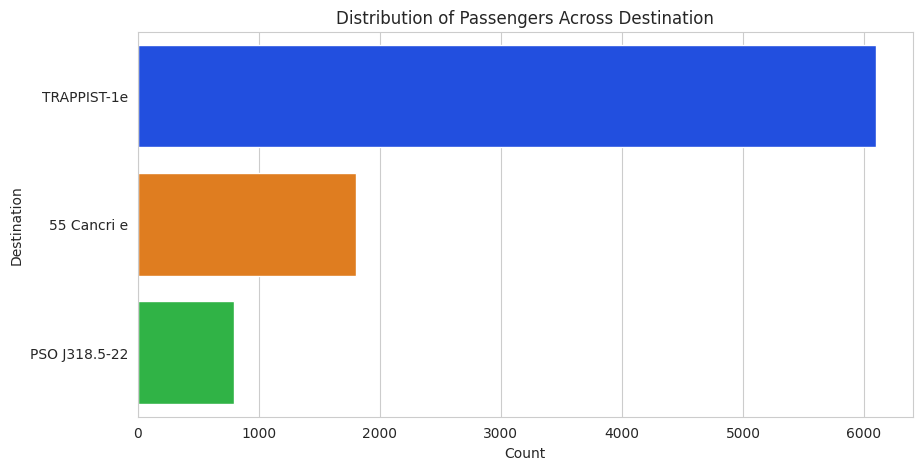

In [ ]:
#Destination
plt.figure(figsize=(10,5))
sns.countplot(y='Destination', data=train, order=train['Destination'].value_counts().index, palette='bright')
plt.title('Distribution of Passengers Across Destination')
plt.xlabel('Count')
plt.ylabel('Destination')
plt.show()


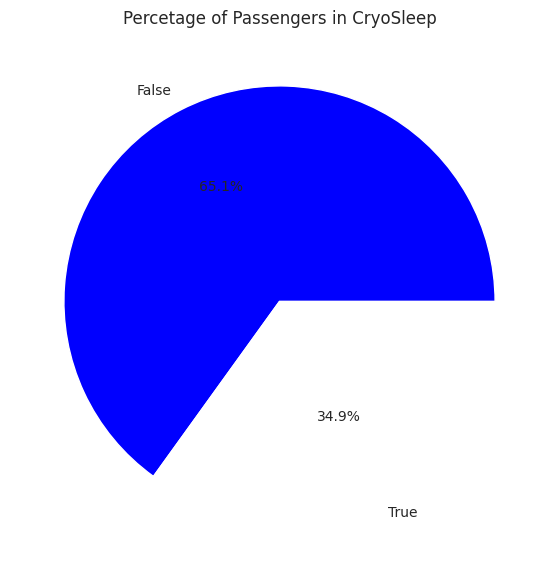

In [ ]:
#Percentage of passengers put in Cryosleep vs those not
cryosleep_counts = train['CryoSleep'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(cryosleep_counts, labels=cryosleep_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Percetage of Passengers in CryoSleep')
plt.show()

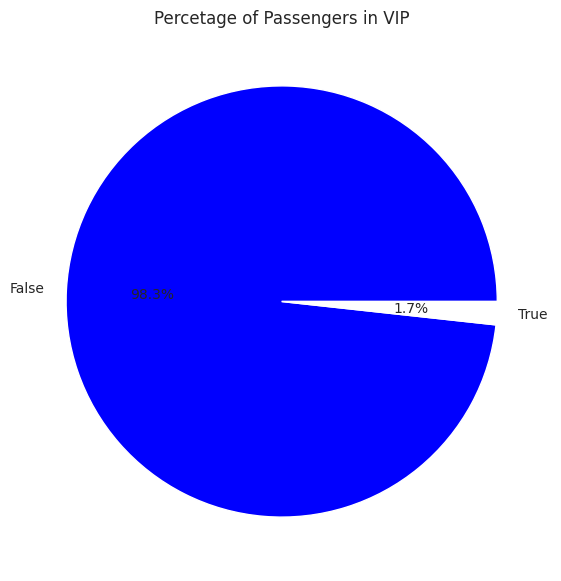

In [ ]:
#Percentage of passengers put in Cryosleep vs those not
vip_counts = test['VIP'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(vip_counts, labels=vip_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Percetage of Passengers in VIP')
plt.show()

In [ ]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

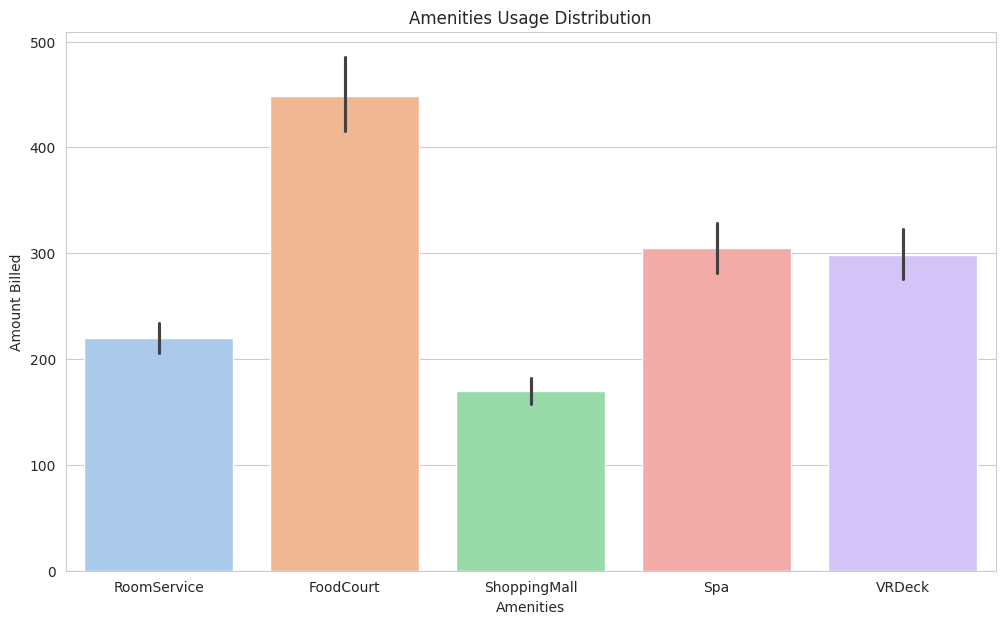

In [ ]:
#Amenities usage distribution
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(12,7))
sns.barplot(data=train[amenities], palette='pastel')
plt.title('Amenities Usage Distribution')
plt.ylabel('Amount Billed')
plt.xlabel('Amenities')
plt.show()

### Bivariate Analysis


<ipython-input-75-2b1e97c741d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transported', y='Age', data=train,palette='viridis'),


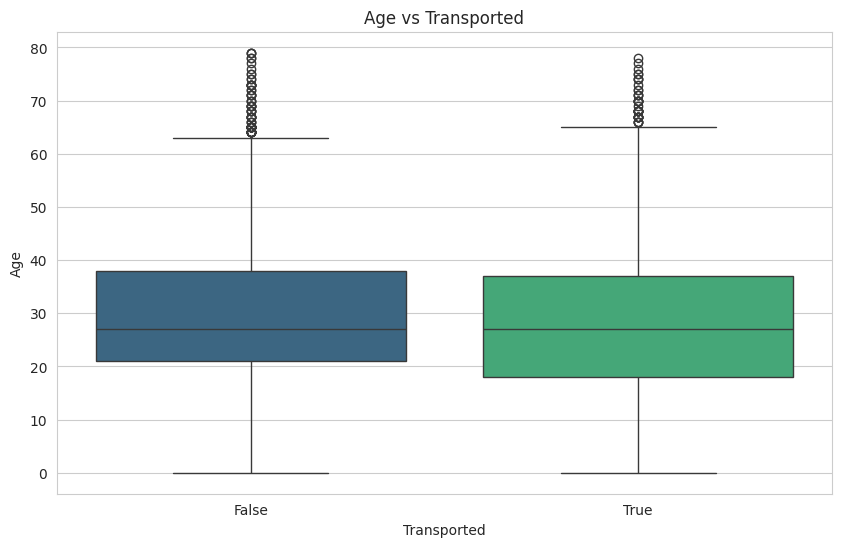

In [ ]:
#Age vs Transported
plt.figure(figsize=(10,6))
sns.boxplot(x='Transported', y='Age', data=train,palette='viridis'),
plt.title('Age vs Transported')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()

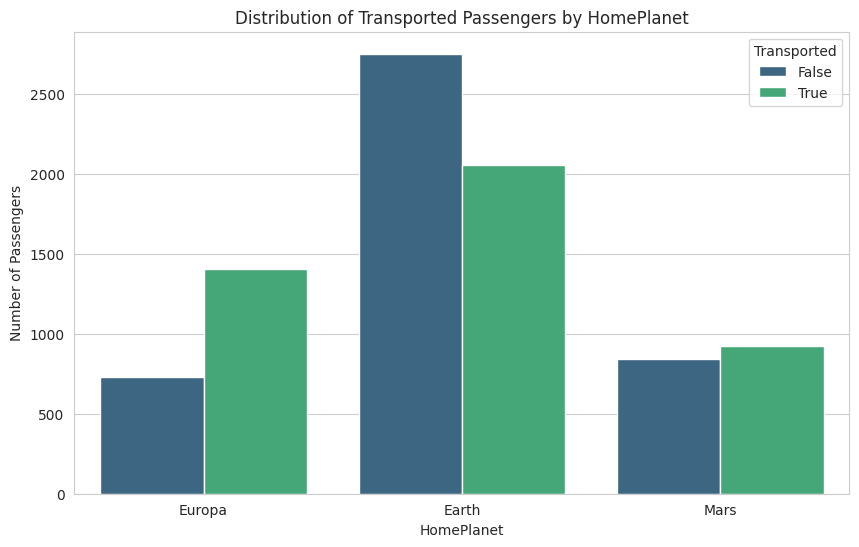

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Create a count plot with 'HomePlanet' on the x-axis and the 'Transported' column for hue
sns.countplot(data=train, x='HomePlanet', hue='Transported', palette='viridis')

# Set the title and labels of the plot
plt.title('Distribution of Transported Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Number of Passengers')

# Display the plot
plt.show()

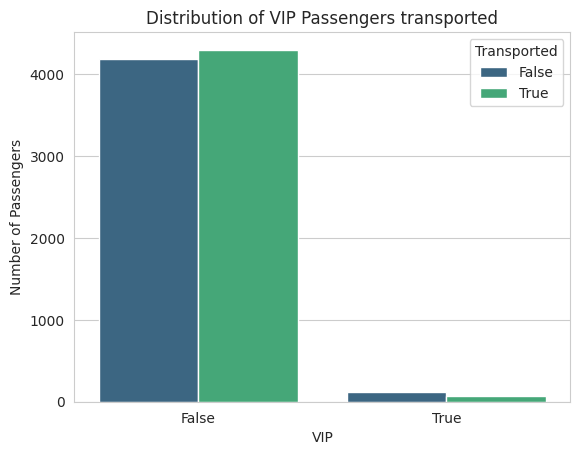

In [ ]:
# Create a count plot with 'HomePlanet' on the x-axis and the 'Transported' column for hue
sns.countplot(data=train, x='VIP', hue='Transported', palette='viridis')

# Set the title and labels of the plot
plt.title('Distribution of VIP Passengers transported')
plt.xlabel('VIP')
plt.ylabel('Number of Passengers')

# Display the plot
plt.show()

#### Multivariate Analysis

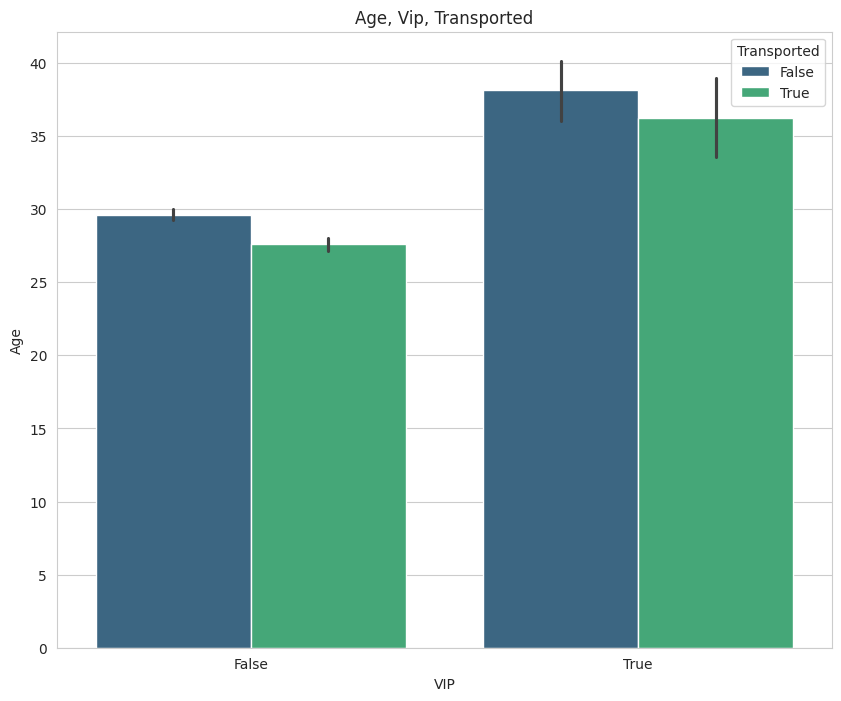

In [ ]:
#AGe, VIP, TRansported
plt.figure(figsize=(10,8))
sns.barplot(x='VIP', y='Age', hue='Transported', data=train, palette='viridis')
plt.title('Age, Vip, Transported')
plt.xlabel('VIP')
plt.ylabel('Age')
plt.show()

<ipython-input-79-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
<ipython-input-79-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
<ipython-input-79-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
<ipython-input-79-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

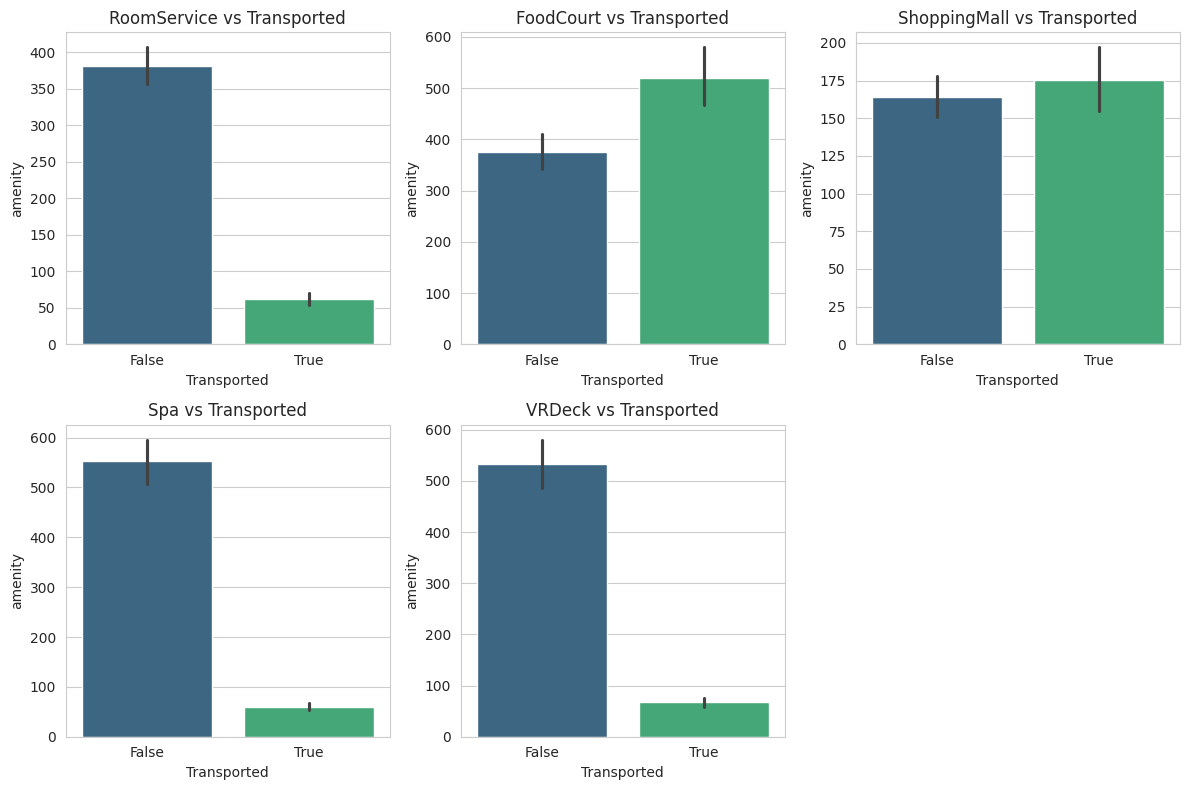

In [ ]:
#Amenities usage and transported
plt.figure(figsize=(12, 8))
for i, amenity in enumerate (amenities, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
    plt.title(f'{amenity} vs Transported')
    plt.xlabel('Transported')
    plt.ylabel('amenity')
plt.tight_layout()
plt.show()

<ipython-input-80-28666a7cc74d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIP', y=amenity, data=train, palette='viridis')
<ipython-input-80-28666a7cc74d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIP', y=amenity, data=train, palette='viridis')
<ipython-input-80-28666a7cc74d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIP', y=amenity, data=train, palette='viridis')
<ipython-input-80-28666a7cc74d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

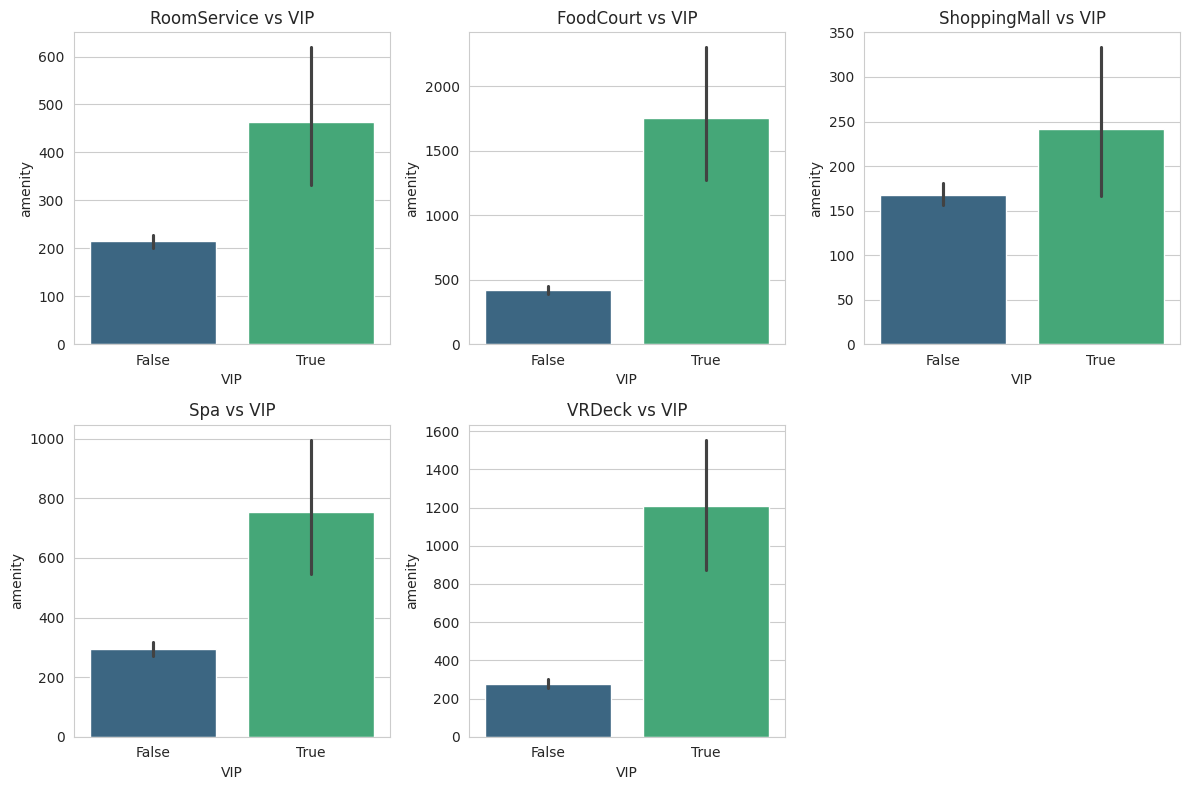

In [ ]:
#Amenities usage and VIP
plt.figure(figsize=(12, 8))
for i, amenity in enumerate (amenities, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='VIP', y=amenity, data=train, palette='viridis')
    plt.title(f'{amenity} vs VIP')
    plt.xlabel('VIP')
    plt.ylabel('amenity')
plt.tight_layout()
plt.show()

In [ ]:
#statisitical summary

train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


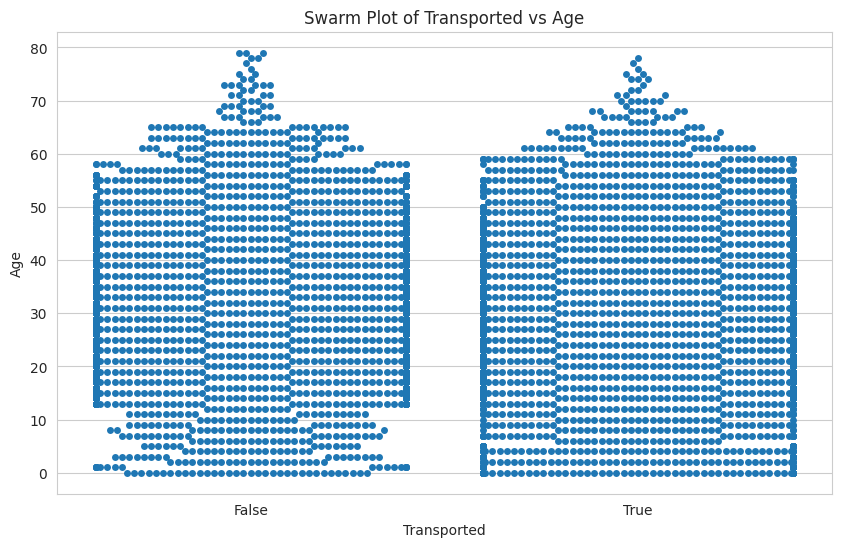

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Transported', y='Age', data=train)
plt.title('Swarm Plot of Transported vs Age')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()

In [ ]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Label encode
train['HomePlanet'] = le.fit_transform(train['HomePlanet'])
train['Destination'] = le.fit_transform(train['Destination'])
train['Transported'] = le.fit_transform(train['Transported'])
train['CryoSleep'] = le.fit_transform(train['CryoSleep'])
train['Cabin'] = le.fit_transform(train['Cabin'])
train['VIP'] = le.fit_transform(train['VIP'])

In [ ]:
test['HomePlanet'] = le.fit_transform(test['HomePlanet'])
test['Destination'] = le.fit_transform(test['Destination'])
test['CryoSleep'] = le.fit_transform(test['CryoSleep'])
test['Cabin'] = le.fit_transform(test['Cabin'])
test['VIP'] = le.fit_transform(test['VIP'])

In [ ]:
# Drop 'Name' and 'PassengerId' columns
train.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [ ]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [ ]:
# Drop 'Name' and 'PassengerId' columns
test.drop(['Name', 'PassengerId','Cabin'], axis=1, inplace=True)

In [ ]:
train.shape, test.shape

((8693, 11), (4277, 10))

In [ ]:
# Split the DataFrame into features (X) and target variable (y)
X = train.drop('Transported', axis=1)
y = train['Transported']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)
rf.fit(x_train, y_train)
y_predr = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test,y_predr)

0.7837423312883436